dataset_link : https://www.kaggle.com/datasets/nikhilgurav21/nail-disease-detection-dataset

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image

In [55]:
TRAINING_DIR = './nails_dataset/train'
VALIDATION_DIR = './nails_dataset/valid'

In [56]:
os.listdir(TRAINING_DIR)

['Acral_Lentiginous_Melanoma',
 'blue_finger',
 'clubbing',
 'Healthy_Nail',
 'Onychogryphosis',
 'pitting']

In [57]:
os.listdir(VALIDATION_DIR)

['Acral_Lentiginous_Melanoma',
 'blue_finger',
 'clubbing',
 'Healthy_Nail',
 'Onychogryphosis',
 'pitting']

In [58]:
# Iterate over each subdirectory and count the number of images
for dir_name in os.listdir(TRAINING_DIR):
    dir_path = os.path.join(TRAINING_DIR, dir_name)  # Create full path to the subdirectory
    if os.path.isdir(dir_path):  # Check if it's a directory
        num_images = len(os.listdir(dir_path))  # List files inside the subdirectory
        print(f"{dir_name} : {num_images} images")

Acral_Lentiginous_Melanoma : 735 images
blue_finger : 603 images
clubbing : 767 images
Healthy_Nail : 323 images
Onychogryphosis : 677 images
pitting : 639 images


In [59]:
# Iterate over each subdirectory and count the number of images
for dir_name in os.listdir(VALIDATION_DIR):
    dir_path = os.path.join(VALIDATION_DIR, dir_name)  # Create full path to the subdirectory
    if os.path.isdir(dir_path):  # Check if it's a directory
        num_images = len(os.listdir(dir_path))  # List files inside the subdirectory
        print(f"{dir_name} : {num_images} images")

Acral_Lentiginous_Melanoma : 18 images
blue_finger : 9 images
clubbing : 16 images
Healthy_Nail : 20 images
Onychogryphosis : 12 images
pitting : 16 images


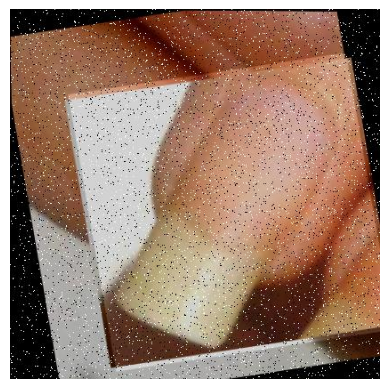

Image size: 416 x 416 pixels


In [60]:
# Path to image file example
image_path = './nails_dataset/train/Healthy_Nail/h2_png.rf.77ea72a63739a994e0f67c60a987cf63.jpg'

# Open the image using PIL
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

# Get the image size
width, height = image.size
print(f"Image size: {width} x {height} pixels")


In [61]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=16,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  return train_generator, validation_generator
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 3744 images belonging to 6 classes.
Found 91 images belonging to 6 classes.


In [62]:
# Get a batch from the train/validation generator
train_batch = next(train_generator)
validation_batch = next(validation_generator)

# Print the shape of the images and labels in the batch
print("Train Generator - Image batch shape:", train_batch[0].shape)
print("Train Generator - Label batch shape:", train_batch[1].shape)

print("Validation Generator - Image batch shape:", validation_batch[0].shape)
print("Validation Generator - Label batch shape:", validation_batch[1].shape)


Train Generator - Image batch shape: (16, 150, 150, 3)
Train Generator - Label batch shape: (16, 6)
Validation Generator - Image batch shape: (16, 150, 150, 3)
Validation Generator - Label batch shape: (16, 6)


In [63]:
# create model
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.compile(optimizer="adam",loss="categorical_crossentropy",
              metrics=["accuracy"])

In [64]:
# Train the model
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator)

Epoch 1/30


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


234/234 ━━━━━━━━━━━━━━━━━━━━ 74s 293ms/step - accuracy: 0.2076 - loss: 1.7304 - val_accuracy: 0.4176 - val_loss: 1.2882
Epoch 2/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 64s 271ms/step - accuracy: 0.2812 - loss: 1.5149 - val_accuracy: 0.4945 - val_loss: 1.2119
Epoch 3/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 64s 272ms/step - accuracy: 0.3486 - loss: 1.4535 - val_accuracy: 0.4615 - val_loss: 1.2191
Epoch 4/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 61s 259ms/step - accuracy: 0.4338 - loss: 1.3451 - val_accuracy: 0.5275 - val_loss: 1.1376
Epoch 5/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 59s 252ms/step - accuracy: 0.4962 - loss: 1.2264 - val_accuracy: 0.4396 - val_loss: 1.2014
Epoch 6/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 61s 261ms/step - accuracy: 0.5097 - loss: 1.1860 - val_accuracy: 0.5934 - val_loss: 1.0744
Epoch 7/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 61s 261ms/step - accuracy: 0.5807 - loss: 1.0756 - val_accuracy: 0.5385 - val_loss: 1.0811
Epoch 8/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 59s 249ms/step - accuracy: 0.5938 - loss: 0.9964 - val

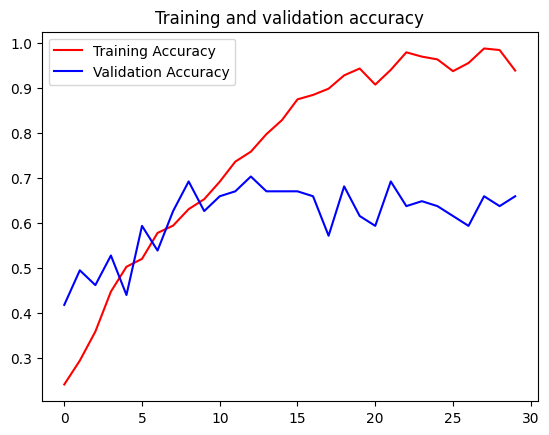

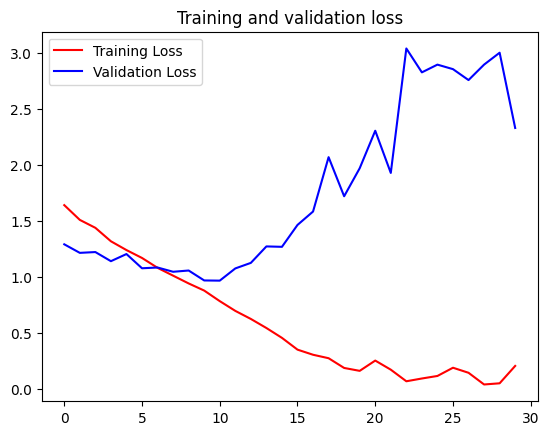

In [65]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()  # Add legend
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()  # Add legend
plt.show()


The model is overfitting on the training data, as indicated by the high training accuracy (95.37%) 
and low validation accuracy (60.44%). Additionally, the large gap between the training loss (0.1440) 
and validation loss (2.4558) further suggests overfitting. This implies that the model is learning 
the training data very well but is not generalizing effectively to unseen data.

To prevent overfitting, I will try using data augmentation techniques and adding dropout layers to the model.


In [66]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):


  train_datagen = ImageDataGenerator(rescale=(1/255.0),
                                     rotation_range=40,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))


  validation_datagen = ImageDataGenerator(rescale=(1/255.0))

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=16,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  return train_generator, validation_generator

train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 3744 images belonging to 6 classes.
Found 91 images belonging to 6 classes.


In [69]:
# create model by adding dropout layers
model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6,activation='softmax'))

model.compile(optimizer="adam",loss="categorical_crossentropy",
              metrics=["accuracy"])

In [70]:
# Set up a ModelCheckpoint callback to save the best model based on validation loss
checkpoint=ModelCheckpoint('nails_disease.keras',  # File path to save the model
                          monitor='val_loss', # Monitor validation loss during training
                          mode='min',  # We want to minimize the validation loss
                          save_best_only=True, 
                          verbose=1) # Print a message when the model is saved

# Set up an EarlyStopping callback to stop training early if the model stops improving
early_stop=EarlyStopping(monitor='val_loss',
                       min_delta=0.001,
                       patience=5,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,early_stop]

In [71]:
# Train the model
history = model.fit(train_generator,
                    epochs=100,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks =callbacks)

Epoch 1/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.1845 - loss: 1.7758
Epoch 1: val_loss improved from inf to 1.29904, saving model to nails_disease.keras
234/234 ━━━━━━━━━━━━━━━━━━━━ 84s 332ms/step - accuracy: 0.1846 - loss: 1.7756 - val_accuracy: 0.3736 - val_loss: 1.2990
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.2953 - loss: 1.5717
Epoch 2: val_loss did not improve from 1.29904
234/234 ━━━━━━━━━━━━━━━━━━━━ 77s 323ms/step - accuracy: 0.2954 - loss: 1.5715 - val_accuracy: 0.3956 - val_loss: 1.3027
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.3554 - loss: 1.4528
Epoch 3: val_loss did not improve from 1.29904
234/234 ━━━━━━━━━━━━━━━━━━━━ 79s 334ms/step - accuracy: 0.3555 - loss: 1.4528 - val_accuracy: 0.4286 - val_loss: 1.5019
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.4025 - loss: 1.3778
Epoch 4: val_loss improved from 1.29904 to 1.25028, saving model to nails_disease.keras
234/234 ━━━━━━━━━━

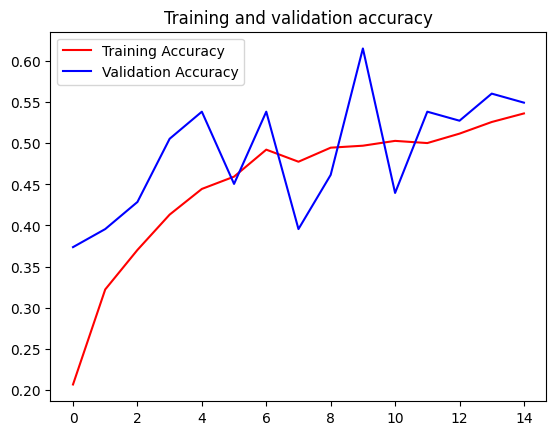

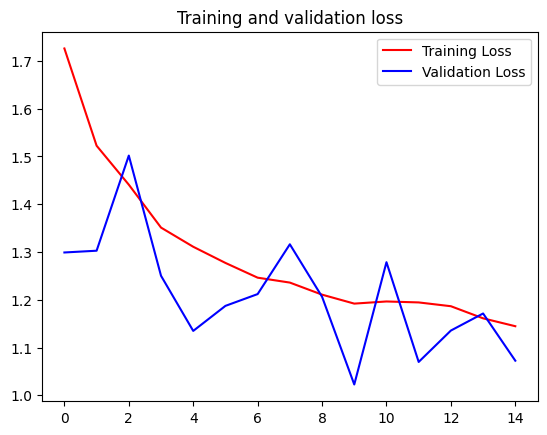

In [73]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()  # Add legend
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()  # Add legend
plt.show()


Even after using data augmentation techniques and adding dropout layers to the model, its performance did not improve.

To achieve a good result I will use transfer learning


In [1]:
# Download the inception_v3_weights
!curl -o ./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 83.8M    0  318k    0     0   296k      0  0:04:49  0:00:01  0:04:48  297k
  1 83.8M    1 1214k    0     0   582k      0  0:02:27  0:00:02  0:02:25  583k
  2 83.8M    2 1918k    0     0   625k      0  0:02:17  0:00:03  0:02:14  626k
  3 83.8M    3 2814k    0     0   691k      0  0:02:04  0:00:04  0:02:00  692k
  4 83.8M    4 3806k    0     0   749k      0  0:01:54  0:00:05  0:01:49  763k
  5 83.8M    5 4446k    0     0   716k      0  0:01:59  0:00:06  0:01:53  804k
  5 83.8M    5 4798k    0     0   678k      0  0:02:06  0:00:07  0:01:59  718k
  5 83.8M    5 5022k    0     0   619k      0  0:02:18  0:00:08  0:02:10  615k
  6 83.8M    6 5406k    0     0   596k      0  0:02

In [2]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [11]:
def create_pre_trained_model(local_weights_file):

  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [12]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_99 (Conv2D)  │ (None, 74, 74,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │         96 │ conv2d_99[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_100 (Conv2D) │ (None, 72, 72,    │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_100[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_101 (Conv2D) │ (None, 72, 72,    │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_101[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 35, 35,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_102 (Conv2D) │ (None, 35, 35,    │      5,120 │ max_pooling2d_9[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_102[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_103 (Conv2D) │ (None, 33, 33,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_103[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [13]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [14]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [15]:
def output_of_last_layer(pre_trained_model):

  last_desired_layer = pre_trained_model.get_layer('mixed7')

  last_output = last_desired_layer.output
  print('last layer output shape: ', last_output.shape)
  print('last layer output: ', last_output)

  return last_output

In [16]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  <KerasTensor shape=(None, 7, 7, 768), dtype=float32, sparse=False, name=keras_tensor_730>


In [17]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.src.models.functional.Functional'>


In [18]:
def create_final_model(pre_trained_model, last_output):

  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  # Add a fully connected layer with 512 hidden units and ReLU activation
  x = layers.Dense(512, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)
  # Add a final softmax layer for classification
  x = layers.Dense(6, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])


  return model

In [19]:
# Save the model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 28,246,438 total parameters in this model.
There are 19,271,174 trainable parameters in this model.


In [20]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/100


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


234/234 - 62s - 267ms/step - accuracy: 0.6672 - loss: 1.3185 - val_accuracy: 0.8352 - val_loss: 0.4818
Epoch 2/100
234/234 - 54s - 233ms/step - accuracy: 0.7975 - loss: 0.5745 - val_accuracy: 0.8571 - val_loss: 0.3611
Epoch 3/100
234/234 - 54s - 231ms/step - accuracy: 0.8283 - loss: 0.4888 - val_accuracy: 0.8571 - val_loss: 0.4870
Epoch 4/100
234/234 - 54s - 232ms/step - accuracy: 0.8432 - loss: 0.4426 - val_accuracy: 0.9011 - val_loss: 0.2362
Epoch 5/100
234/234 - 54s - 233ms/step - accuracy: 0.8643 - loss: 0.3962 - val_accuracy: 0.8791 - val_loss: 0.2695
Epoch 6/100
234/234 - 54s - 232ms/step - accuracy: 0.8697 - loss: 0.3703 - val_accuracy: 0.8791 - val_loss: 0.3205
Epoch 7/100
234/234 - 54s - 229ms/step - accuracy: 0.8729 - loss: 0.3703 - val_accuracy: 0.9011 - val_loss: 0.3222
Epoch 8/100
234/234 - 54s - 230ms/step - accuracy: 0.8862 - loss: 0.3336 - val_accuracy: 0.8791 - val_loss: 0.3179
Epoch 9/100
234/234 - 53s - 228ms/step - accuracy: 0.8956 - loss: 0.3191 - val_accuracy: 0.9

Using transfer learning we have achieved a good performance.

In [23]:
# Save the entire model to a file
model.save('nail_disease_detection_model.h5')

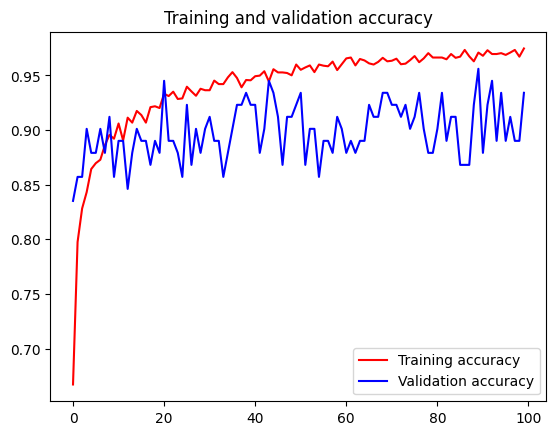

<Figure size 640x480 with 0 Axes>

In [22]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [27]:
# Get the class indices from the train_generator
class_indices = train_generator.class_indices

# Print the class indices to see the mapping
class_indices

{'Acral_Lentiginous_Melanoma': 0, 'Healthy_Nail': 1, 'Onychogryphosis': 2, 'blue_finger': 3, 'clubbing': 4, 'pitting': 5}


In [28]:
# Create a reverse mapping from indices to class names
index_to_class = {v: k for k, v in class_indices.items()}
index_to_class

{0: 'Acral_Lentiginous_Melanoma',
 1: 'Healthy_Nail',
 2: 'Onychogryphosis',
 3: 'blue_finger',
 4: 'clubbing',
 5: 'pitting'}

In [30]:
# Load and preprocess an image
img_path = './nails_dataset/valid/Healthy_Nail/h14_png.rf.9e48f154edf68fa4094ba876c23615f1.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the predicted label
predicted_label = index_to_class[predicted_class_index]
print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted label: Healthy_Nail


In [33]:
predicted_results = []
true_labels = []

# Iterate through all files in the valid dir and its subdirs
for root, dirs, files in os.walk("./nails_dataset/valid"):
    for file in files:
        if file.endswith((".jpg")):
            test_image_path = os.path.join(root, file)

            # Extract the true label from the folder name (root)
            true_label = os.path.basename(root)
            true_labels.append(class_indices[true_label])  # Convert to index

            # Load and preprocess the image 
            image_result = Image.open(test_image_path)
            test_image = image.load_img(test_image_path, target_size=(150, 150))
            test_image = image.img_to_array(test_image)
            test_image = test_image / 255.0
            test_image = np.expand_dims(test_image, axis=0)

            # Make predictions 
            res = model.predict(test_image)
            predicted_results.append(np.argmax(res))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

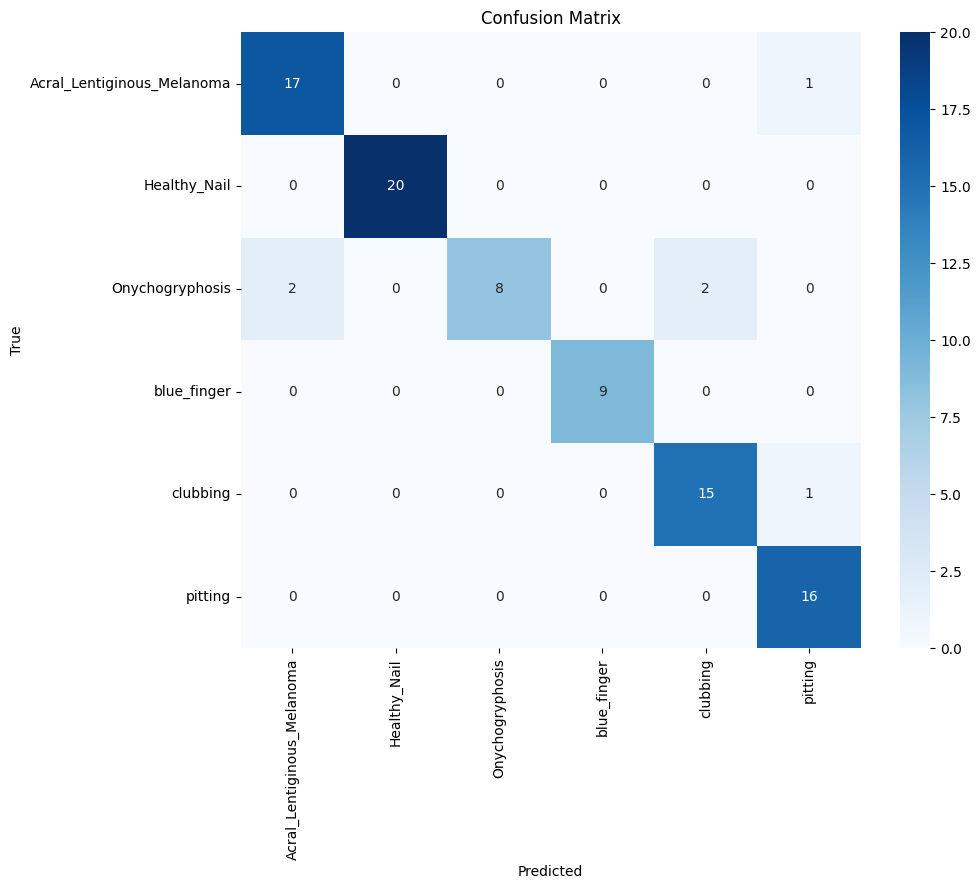

In [36]:
# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_results)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(index_to_class.values()),
            yticklabels=list(index_to_class.values()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [41]:
# Generate a classification report
class_report = classification_report(true_labels, predicted_results,
                                     target_names=index_to_class.values())
print("Classification Report:\n", class_report)

Classification Report:
                             precision    recall  f1-score   support

Acral_Lentiginous_Melanoma       0.89      0.94      0.92        18
              Healthy_Nail       1.00      1.00      1.00        20
           Onychogryphosis       1.00      0.67      0.80        12
               blue_finger       1.00      1.00      1.00         9
                  clubbing       0.88      0.94      0.91        16
                   pitting       0.89      1.00      0.94        16

                  accuracy                           0.93        91
                 macro avg       0.94      0.92      0.93        91
              weighted avg       0.94      0.93      0.93        91

